<a href="https://colab.research.google.com/github/achmadrachmandika/Machine_Learning/blob/main/Machine_Learning_Pertemuan3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Nama : Achmad Rachmandika Rizky Pratama
#Kelas : 3A
#NIM : 2041720125
#Mata Kuliah : Machine Learning
Tanggal 11-09-2023

In [26]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
# import package
import numpy as np
import pandas as pd

In [28]:
# baca data dari file CSV
data = pd.read_csv('/content/drive/MyDrive/Machine Learning/Week3/dataset.csv')

In [29]:
# melihat beberapa data awal
data.head()

# mengecek ukuran data
data.shape

# informasi tentang data
data.info()

# deskripsi data
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [30]:
# import library untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


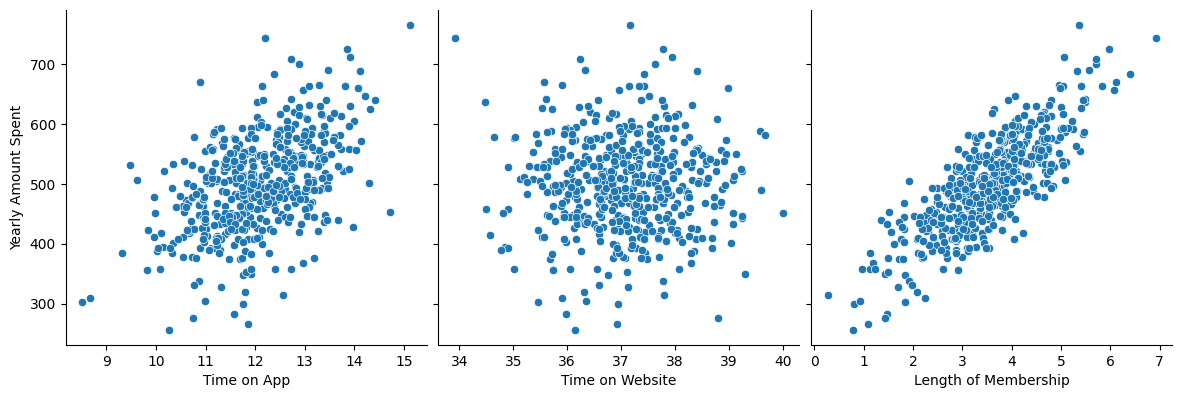

In [31]:
# visualisasi data dengan pairplot
sns.pairplot(data, x_vars=['Time on App', 'Time on Website', 'Length of Membership'],
             y_vars='Yearly Amount Spent', size=4, aspect=1, kind='scatter')
plt.show()

<ipython-input-32-9f46fa45ac4d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)


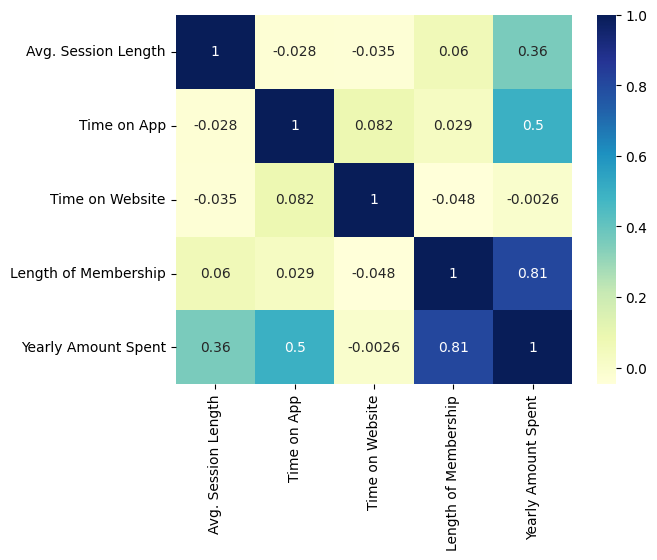

In [32]:
# visualisasi korelasi dengan heatmap
sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
plt.show()

#Regresi Linear

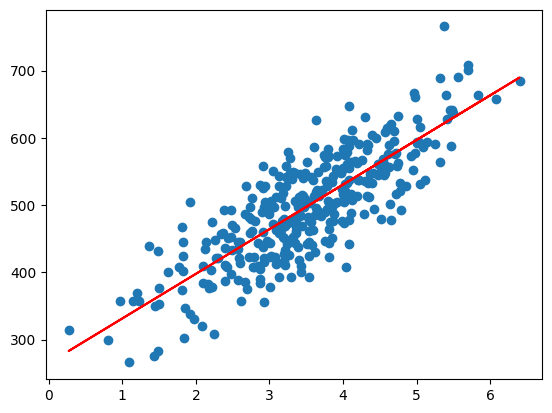

In [33]:
# Membuat variabel bebas X dan Y, contoh pengambilan dari analisis korelasi sebelumnya
X = data['Length of Membership']
y = data['Yearly Amount Spent']

# Pembagian data latih dan data uji dengan proporsi 7:3
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

# Training model
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()

# Visualisasi garis regresi
plt.scatter(X_train, y_train)
plt.plot(X_train, 265.2483 + 66.3015*X_train, 'r')
plt.show()

#Analisis Residural

In [34]:
# Prediksi nilai y_value dari data x yang telah dilatih
y_train_pred = lr.predict(X_train_sm)

# Menghitung residual
res = (y_train - y_train_pred)

<ipython-input-35-d336bf8b039e>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res, bins=15)


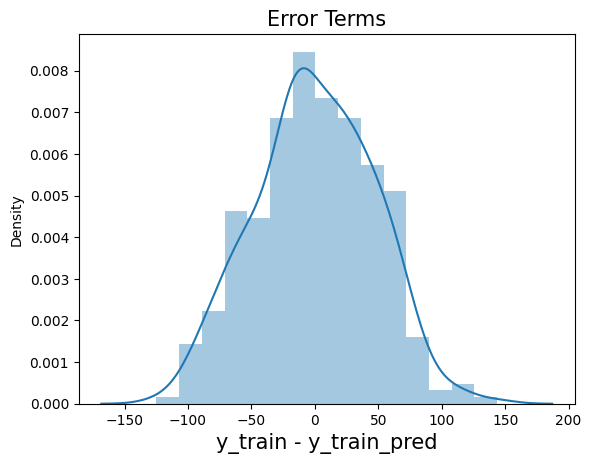

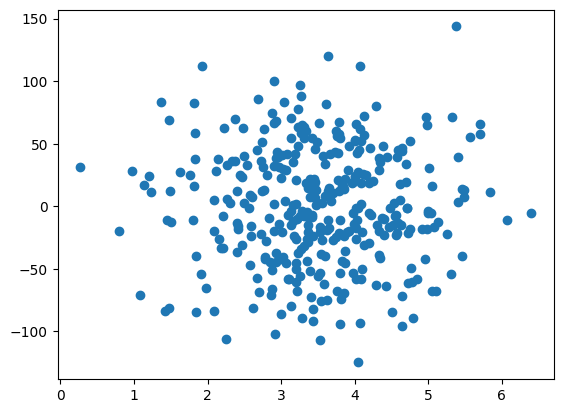

In [35]:
# Histogram residual
fig = plt.figure()
sns.distplot(res, bins=15)
plt.title('Error Terms', fontsize=15)
plt.xlabel('y_train - y_train_pred', fontsize=15)
plt.show()

# Scatter plot residual
plt.scatter(X_train, res)
plt.show()

#Langkah 8: Prediksi pada Data Uji dan Evaluasi Model

In [36]:
# Prediksi pada data uji
X_test_sm = sm.add_constant(X_test)
y_test_pred = lr.predict(X_test_sm)

# Hitung nilai R-squared
from sklearn.metrics import r2_score

r_squared = r2_score(y_test, y_test_pred)

#Langkah 9: Visualisasi Hasil

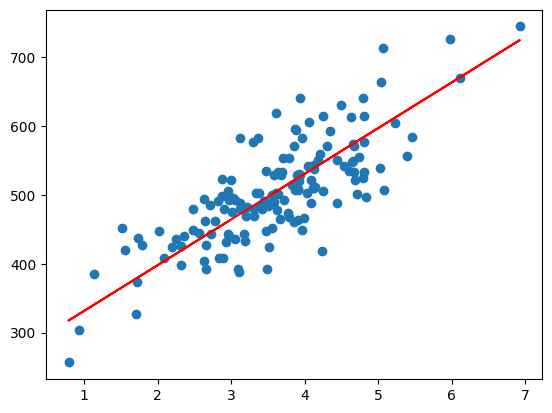

In [37]:
# Visualisasi data uji dan hasil prediksi
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()

#Praktikum 2

In [38]:
# Mengimpor library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [39]:
df = pd.read_csv('/content/drive/MyDrive/Machine Learning/Week3/Posisi_gaji.csv')
X = df.iloc[:, 1:2].values
y = df.iloc[:, 2].values

In [40]:
# melihat beberapa data awal
df.head()

# # mengecek ukuran data
# df.shape

# # informasi tentang data
# df.info()

# # deskripsi data
# df.describe()

,Posisi,Level,Gaji
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


#Feature Scaling

In [41]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X.reshape(-1, 1))
y = sc_y.fit_transform(y.reshape(-1, 1))

#Fitting SVR ke Dataset

In [42]:
# Fitting SVR ke dataset
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

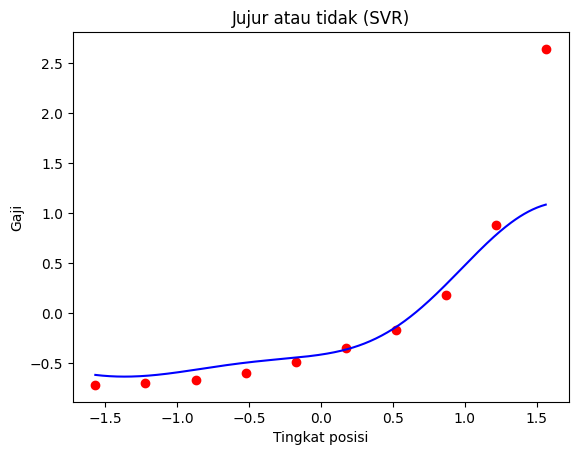

In [43]:
# Visualisasi hasil SVR (resolusi tinggi dan kurva yang lebih halus)
X_grid = np.arange(min(X), max(X), 0.01).reshape(-1, 1)
plt.scatter(X, y, color='red')
plt.plot(X_grid, regressor.predict(X_grid), color='blue')
plt.title('Jujur atau tidak (SVR)')
plt.xlabel('Tingkat posisi')
plt.ylabel('Gaji')
plt.show()

#Prediksi Hasil:
#- Membuat array 2D yang berisi tingkat posisi yang akan diprediksi. Dalam contoh ini, tingkat posisi 6.5.
#- Menskalakan fitur prediksi menggunakan sc_X.transform.
#- Melakukan prediksi menggunakan model SVR yang telah dilatih.
#- Mengembalikan hasil prediksi ke dalam skala aslinya menggunakan sc_y.inverse_transform.

In [44]:
# Prediksi hasil
# Buat array 2D yang berisi tingkat posisi yang akan diprediksi
tingkat_posisi_prediksi = np.array([[6.5]])
# Penskalaan fitur untuk data yang akan diprediksi
tingkat_posisi_prediksi = sc_X.transform(tingkat_posisi_prediksi)
# Melakukan prediksi menggunakan model SVR
gaji_prediksi = regressor.predict(tingkat_posisi_prediksi)
# Kembalikan hasil prediksi ke skala aslinya
gaji_prediksi = sc_y.inverse_transform(gaji_prediksi.reshape(-1, 1))

In [45]:
# Menampilkan hasil prediksi
print("Prediksi Gaji untuk Tingkat Posisi 6.5:", gaji_prediksi[0])
plt.show()

Prediksi Gaji untuk Tingkat Posisi 6.5: [170370.0204065]


#Evaluasi Model SVR

In [46]:
# Evaluasi model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Membalikkan penskalaan pada data target yang sudah diprediksi
y_actual = sc_y.inverse_transform(y)
y_pred = regressor.predict(X)

# Menghitung MAE
mae = mean_absolute_error(y_actual, y_pred)

# Menghitung MSE
mse = mean_squared_error(y_actual, y_pred)

# Menghitung RMSE
rmse = np.sqrt(mse)

# Menghitung R-squared
r2 = r2_score(y_actual, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-squared:", r2)

MAE: 249500.11150357974
MSE: 142912240625.2814
RMSE: 378037.3534788347
R-squared: -0.7717363528203269


#Tugas 1: Multiple Linear Regression
#Identifikasi variabel-variabel yang akan digunakan sebagai variabel bebas (fitur) dan variabel target (biaya medis personal).

##Variable bebas : somker, age, sex
##Variable target : charges

In [47]:
# Mengimpor library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
dt = pd.read_csv('/content/drive/MyDrive/Machine Learning/Week3/insurance.csv')

In [48]:
# melihat beberapa data awal
dt.head()

# mengecek ukuran data
# dt.shape

# # informasi tentang data
dt.info()

# # deskripsi data
dt.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    0 non-null      float64
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(3), int64(2), object(2)
memory usage: 73.3+ KB


,age,bmi,children,smoker,charges
count,1338.000000,1338.000000,1338.000000,0.0,1338.000000
mean,39.207025,30.663397,1.094918,NaN,13270.422265
std,14.049960,6.098187,1.205493,NaN,12110.011237
min,18.000000,15.960000,0.000000,NaN,1121.873900
25%,27.000000,26.296250,0.000000,NaN,4740.287150
50%,39.000000,30.400000,1.000000,NaN,9382.033000
75%,51.000000,34.693750,2.000000,NaN,16639.912515
max,64.000000,53.130000,5.000000,NaN,63770.428010


In [8]:
# import library untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


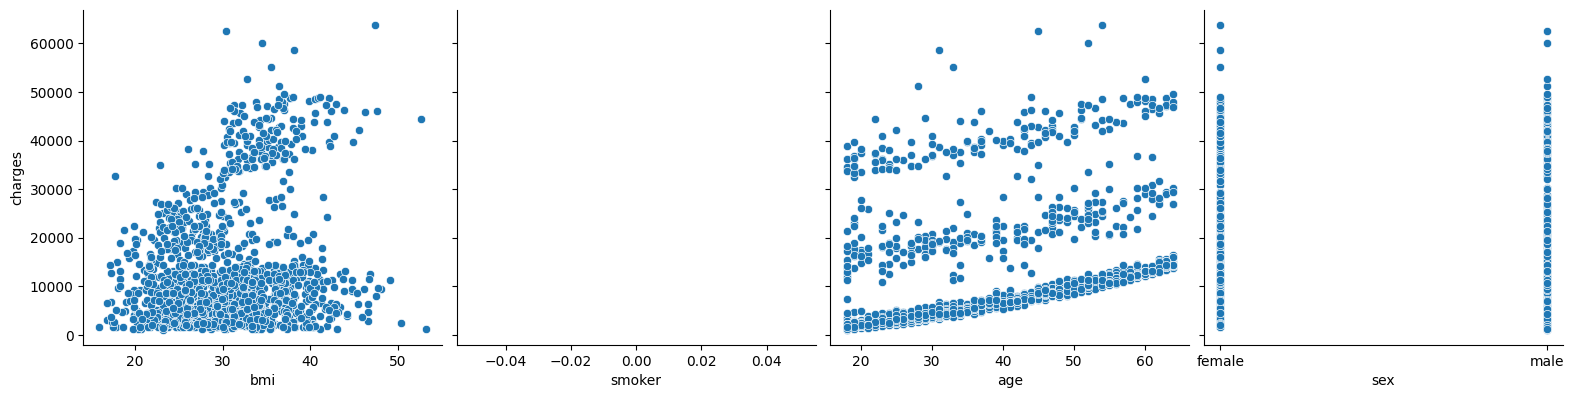

In [61]:
# visualisasi data dengan pairplot
sns.pairplot(dt, x_vars=['bmi','smoker', 'age', 'sex'],
             y_vars='charges', size=4, aspect=1, kind='scatter')
plt.show()

<ipython-input-62-91c33605ce06>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dt.corr(), cmap="YlGnBu", annot=True)


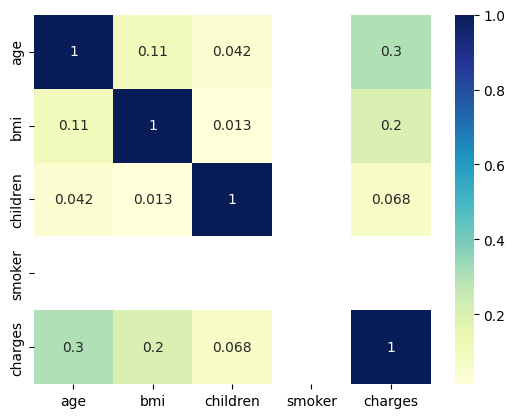

In [62]:
# visualisasi korelasi dengan heatmap
sns.heatmap(dt.corr(), cmap="YlGnBu", annot=True)
plt.show()

#2. Bagi dataset menjadi data latih (train) dan data uji (test) dengan proporsi yang sesuai.

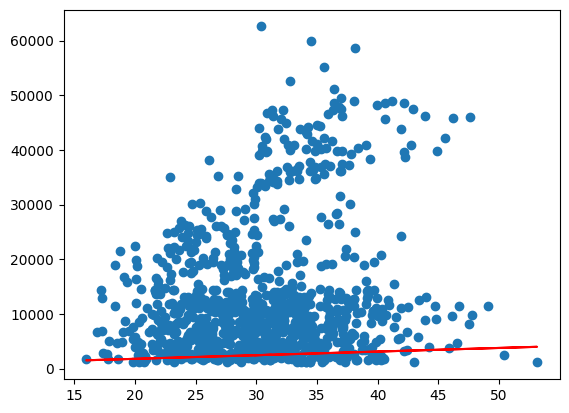

In [58]:
# Membuat variabel bebas X dan Y, contoh pengambilan dari analisis korelasi sebelumnya
X = dt['bmi']
y = dt['charges']

# Pembagian data latih dan data uji dengan proporsi 7:3
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
#Argumen random_state digunakan untuk mengontrol pengacakan data saat membagi,
#sehingga hasil pembagian akan tetap konsisten setiap kali kode dijalankan.

# Training model
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()

# Visualisasi garis regresi
plt.scatter(X_train, y_train)
plt.plot(X_train, 465.2483 + 66.3015*X_train, 'r')
plt.show()

#3. Lakukan feature scaling jika diperlukan.

In [20]:
dt1 = pd.read_csv('/content/drive/MyDrive/Machine Learning/Week3/insurance.csv')

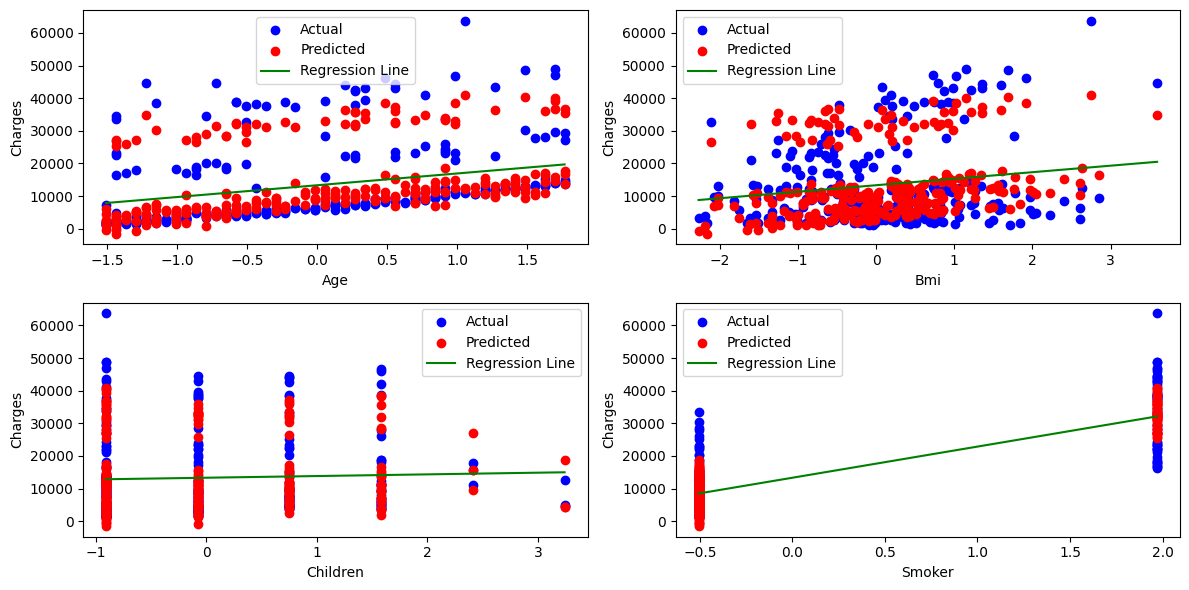

Mean Squared Error (MSE): 33981653.950197764
R-squared: 0.7811147722517886
Mean Absolute Error (MAE): 4213.798594527248


In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# Preprocess the data, e.g., encode 'smoker' variable
dt1['smoker'] = dt1['smoker'].map({'yes': 1, 'no': 0})

# Select independent variables and the target variable
X = dt1[['age', 'bmi', 'children', 'smoker']]
y = dt1['charges']

# Create a scaler object
scaler = StandardScaler()

# Fit and transform the independent variables
X_scaled = scaler.fit_transform(X)

# Split the scaled data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create and train the multiple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Visualize the results
# Create a figure with subplots
plt.figure(figsize=(12, 6))

# Loop through each feature for plotting
for i, feature in enumerate(['age', 'bmi', 'children', 'smoker']):
    plt.subplot(2, 2, i + 1)

    # Scatter plot for the feature vs. 'charges'
    plt.scatter(X_test[:, i], y_test, color='blue', label='Actual')
    plt.scatter(X_test[:, i], y_pred, color='red', label='Predicted')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Charges')

    # Calculate and plot the regression line
    x_values = np.linspace(X_test[:, i].min(), X_test[:, i].max(), 10)
    y_values = model.coef_[i] * x_values + model.intercept_
    plt.plot(x_values, y_values, color='green', label='Regression Line')

    plt.legend()

# Show the plots
plt.tight_layout()
plt.show()
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared: {r2}")
print(f"Mean Absolute Error (MAE): {mae}")

Feature Scaling:langkah-langkah feature scaling menggunakan StandardScaler sudah diimplementasikan. Fitur-fitur independen X di-scaling sebelum dibagi menjadi set pelatihan (X_train) dan set pengujian (X_test).

Membuat Model Multiple Linear Regression: Kode mencakup pembuatan model multiple linear regression menggunakan LinearRegression dari Scikit-Learn. Model tersebut diinisialisasi dengan model = LinearRegression().

Melatih Model dan Melakukan Prediksi: Setelah membagi data menjadi set pelatihan dan set pengujian, model dilatih menggunakan model.fit(X_train, y_train). Kemudian, prediksi dilakukan pada set pengujian menggunakan y_pred = model.predict(X_test).

Evaluasi Model: Setelah mendapatkan prediksi y_pred, metrik evaluasi seperti R-squared, MSE, dan MAE dihitung menggunakan library scikit-learn (mean_squared_error, r2_score, mean_absolute_error). Hasil evaluasi kemudian dicetak menggunakan perintah print.